In [1]:
from gal_goku import summary_stats
save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF'

hmf = summary_stats.HMF(save_dir, fid='L2', narrow=True)
hmfs, _, sim_tags = hmf.load_hmf_sims()
sim_specs = hmf.get_sims_specs()
print(sim_specs.keys())
print(sim_specs['narrow'])
print(len(hmf.get_labels()), hmfs.shape)


01/17/2025 10:22:34 AM Loading narrow HMFs from L2_hmfs_narrow.hdf5
01/17/2025 10:22:34 AM Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
01/17/2025 10:22:34 AM Found 563 matching labels


dict_keys(['box', 'npart', 'narrow'])
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 

01/10/2025 04:16:52 PM Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
01/10/2025 04:16:52 PM Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
2025-01-10 16:16:52.245373: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-01-10 16:16:52.245617: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2025-01-10 16:16:52.245643: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (qpc): /proc/driver/nvidia/version does not exist
2025-01-10 16:16:52.246051: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other o

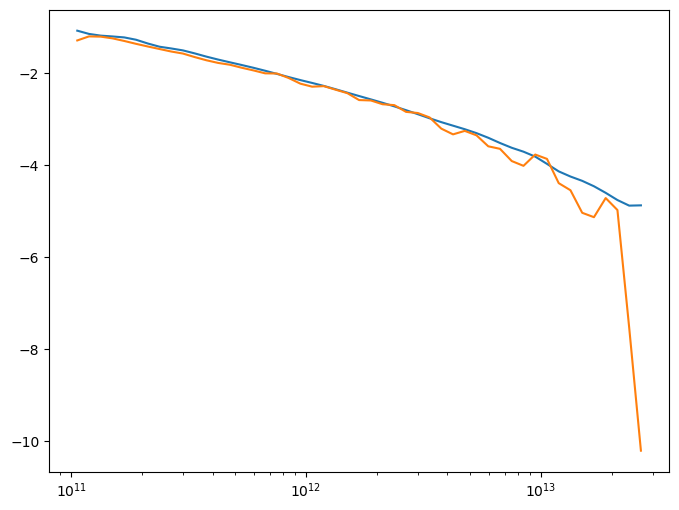

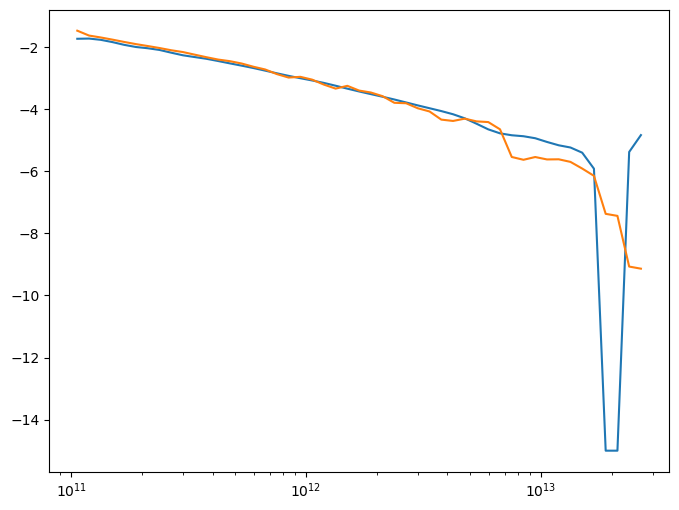

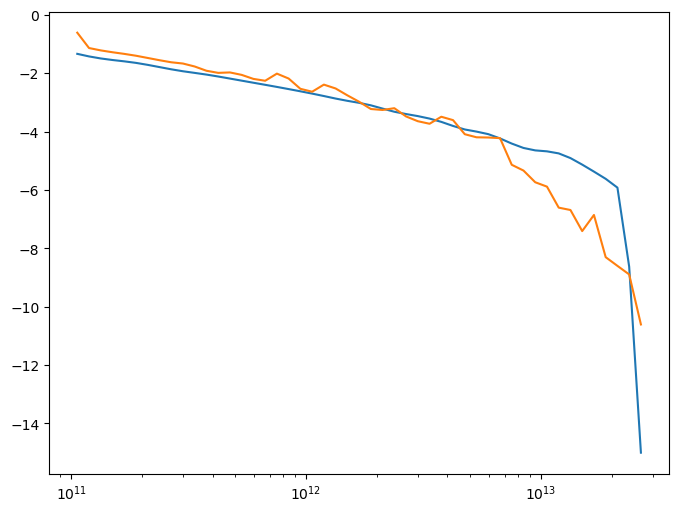

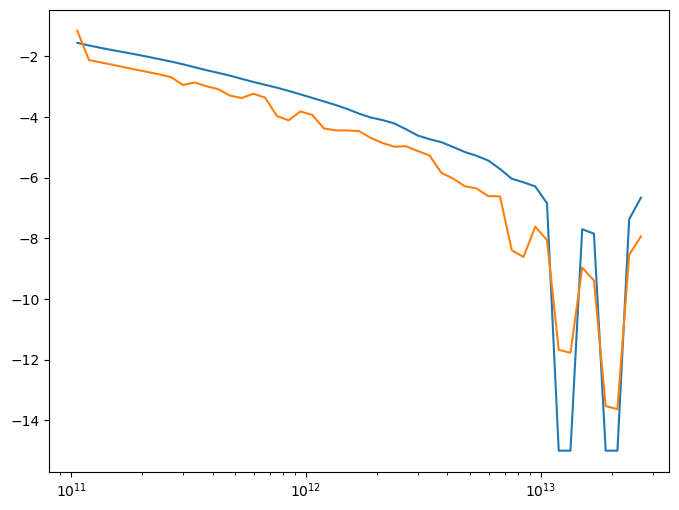

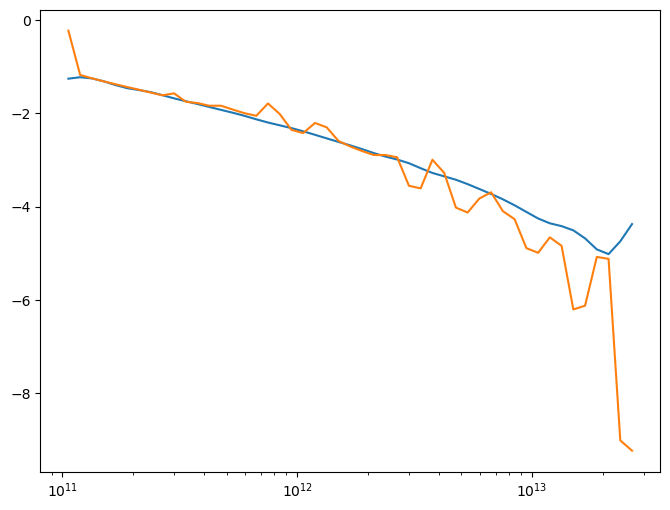

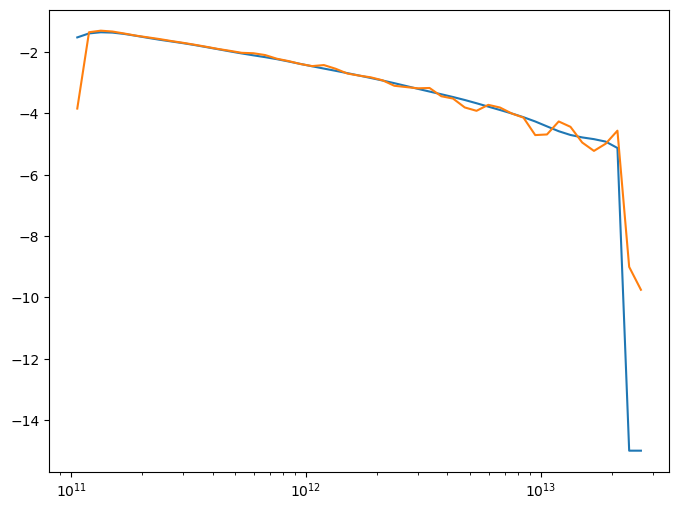

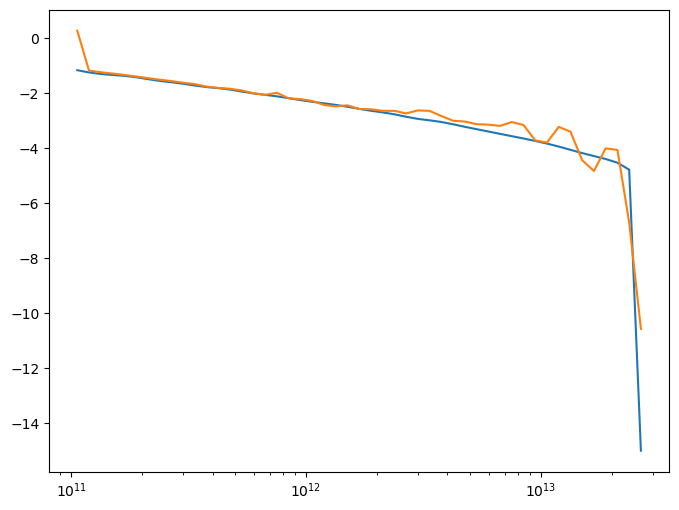

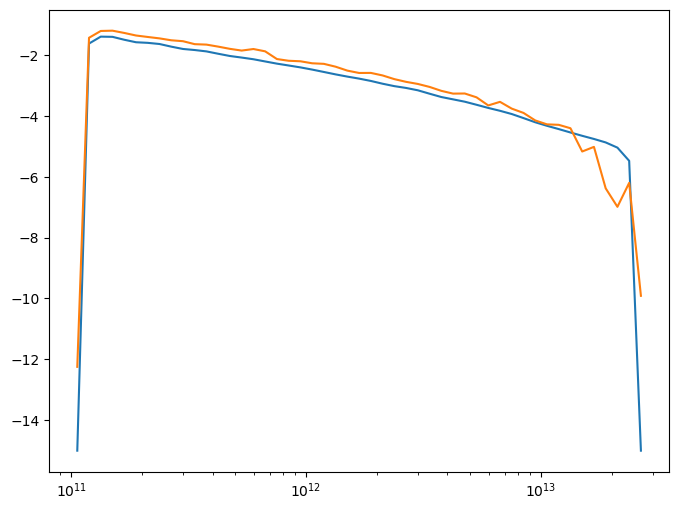

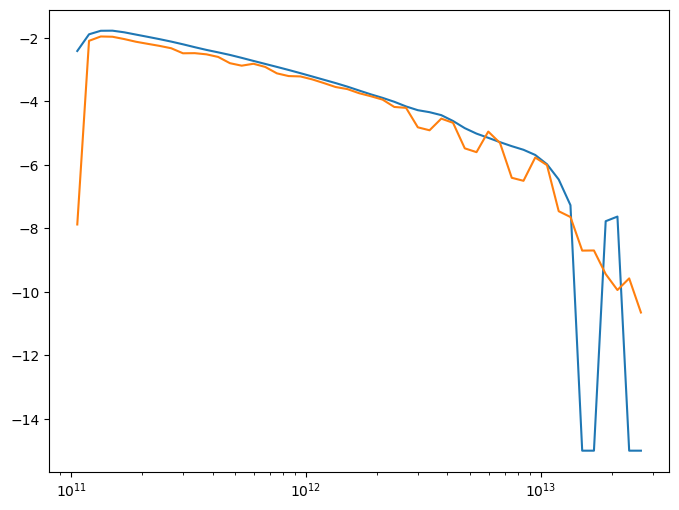

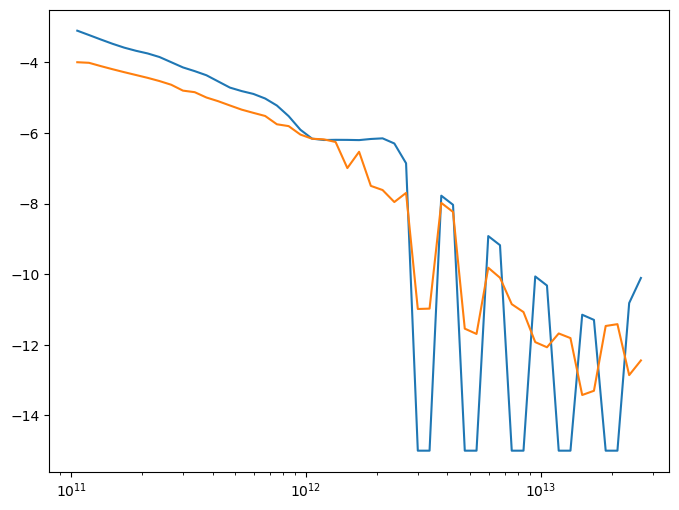

In [2]:
import numpy as np
from gal_goku import emus


data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/'
y_log = 1 # Train the emulator on the log of the correlation function
multi_bin = 0 # Build one emualotr per rp bin
narrow = 0 # Test on Goku-narrow sims or not

savefile = f'{data_dir}train/loo.hdf5'

emu = emus.Hmf(data_dir=data_dir, y_log=y_log, fid='L2', multi_bin=multi_bin, logging_level='INFO')
pred, truth, bins = emu.train_pred_all_sims()

import matplotlib.pyplot as plt

for i in np.random.randint(0, truth.shape[0], 10):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(bins, truth[i,:])
    ax.plot(bins, pred[i,:])
    ax.set_xscale('log')
    #ax.set_yscale('log')

{'box': [], 'npart': [], 'narrow': array([], dtype=float64)}

In [ ]:
from gal_goku import emus
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/'
y_log = 1 # Train the emulator on the log of the correlation function
multi_bin = 0 # Build one emualotr per rp bin
narrow = 0 # Test on Goku-narrow sims or not

savefile = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/train/loo.hdf5'

emu = emus.Hmf(data_dir=data_dir, y_log=y_log, fid='L2', multi_bin=multi_bin, logging_level='INFO')
pred, truth, bins = emu.train_pred_all_sims()

2025-01-10 14:52:22.846421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-10 14:52:22.994712: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-01-10 14:52:22.994743: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-01-10 14:52:23.028850: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-10 14:52:23.649593: W tensorflow/stream_executor/platform/de

## Loo errors:

2025-01-20 11:07:14.095531: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-20 11:07:14.624808: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-01-20 11:07:14.624845: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-01-20 11:07:14.700422: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-20 11:07:16.384411: W tensorflow/stream_executor/platform/de

(1e-05, 0.1)

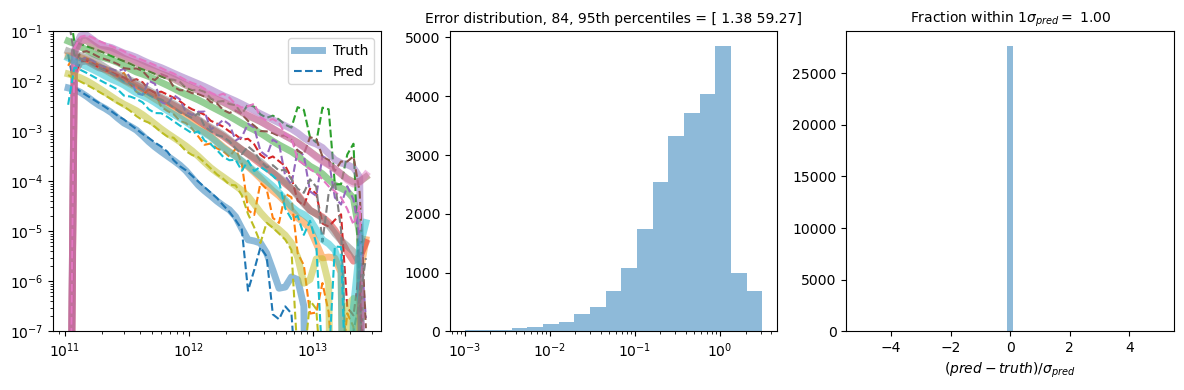

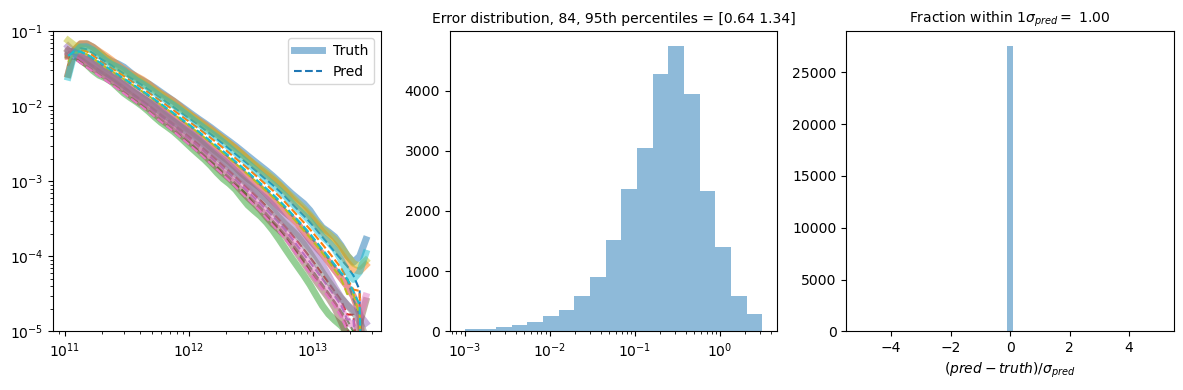

In [1]:
import numpy as np
from gal_goku import plot


plot_hmf_emu = plot.PlotHmfEmu()

seed = np.random.randint(0, 1000)

savefile = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/train/loo.hdf5'
plot_hmf_emu.loo_pred_truth(savefile=savefile, seed=seed)

savefile = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/train/loo_narrow.hdf5'
_, ax = plot_hmf_emu.loo_pred_truth(savefile=savefile, seed=seed)
ax[0].set_ylim(1e-5, 1e-1)